In [11]:
import pandas as pd

# Loading the SMS Spam Collection dataset
df = pd.read_csv(r"D:\Data_set\SMSSpamCollection", sep='\t', names=["label", "text"])
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
import re
import string

def clean_text(text):
    text = text.lower() # Lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    text = re.sub(r'\d+', '', text) # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra spaces
    return text

# Applying cleaning
df['clean_text'] = df['text'].apply(clean_text)

# Preview of cleaned text
df[['text', 'clean_text']].head()


,text,clean_text
0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...
3,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [15]:
# Converting labels: 
# ham=0, spam =1
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# Check balance of classes (number of 1s and 0s)
df['label_num'].value_counts()

label_num
0    4825
1     747
Name: count, dtype: int64

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializeing vectorizer (with stop words)
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95)

# Fit and transform the cleaned text
X = vectorizer.fit_transform(df['clean_text'])
y = df['label_num']

In [19]:
from sklearn.model_selection import train_test_split

# Split the data (train and test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9551569506726457

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       966
           1       1.00      0.66      0.80       149

    accuracy                           0.96      1115
   macro avg       0.98      0.83      0.89      1115
weighted avg       0.96      0.96      0.95      1115



In [31]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_nb_pred = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_nb_pred))
print("\nClassification Report:\n", classification_report(y_test, y_nb_pred))

Naive Bayes Accuracy: 0.9641255605381166

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.73      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.96      0.96      1115



In [65]:
def predict_spam(text):
    # Clean the text
    cleaned = clean_text(text)
    # Vectorize
    vectorized = vectorizer.transform([cleaned])
    # Predict
    pred = model.predict(vectorized)[0]

    return "Spam" if pred == 1 else "Ham"

# Example usage
print(predict_spam("Win a free iPhone now!!"))
print(predict_spam("Hey, are we still meeting today?"))

Spam
Ham


In [67]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[966   0]
 [ 50  99]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       966
           1       1.00      0.66      0.80       149

    accuracy                           0.96      1115
   macro avg       0.98      0.83      0.89      1115
weighted avg       0.96      0.96      0.95      1115



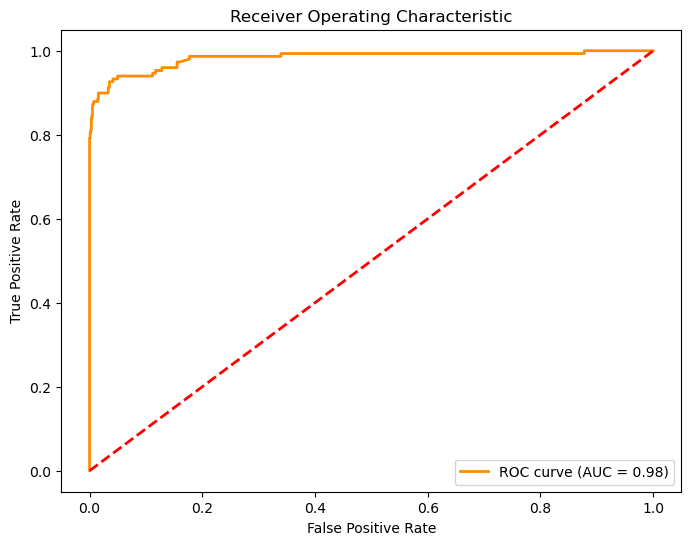

In [71]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()